In [1]:
import numpy as np
from hyperbolicity.tree_fitting_methods.neighbor_joining import NJ
from hyperbolicity.tree_fitting_methods.treerep import TreeRep
from hyperbolicity.tree_fitting_methods.hccfit import HccLinkage
from hyperbolicity.tree_fitting_methods.recover_full_tree import recover_tree_graph, enforce_gromov_closure
from hyperbolicity.tree_fitting_methods.gromov import gromov_tree
from hyperbolicity.delta import compute_hyperbolicity
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import torch

1.5
[]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
2.5
[20]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]
1.0
[0]


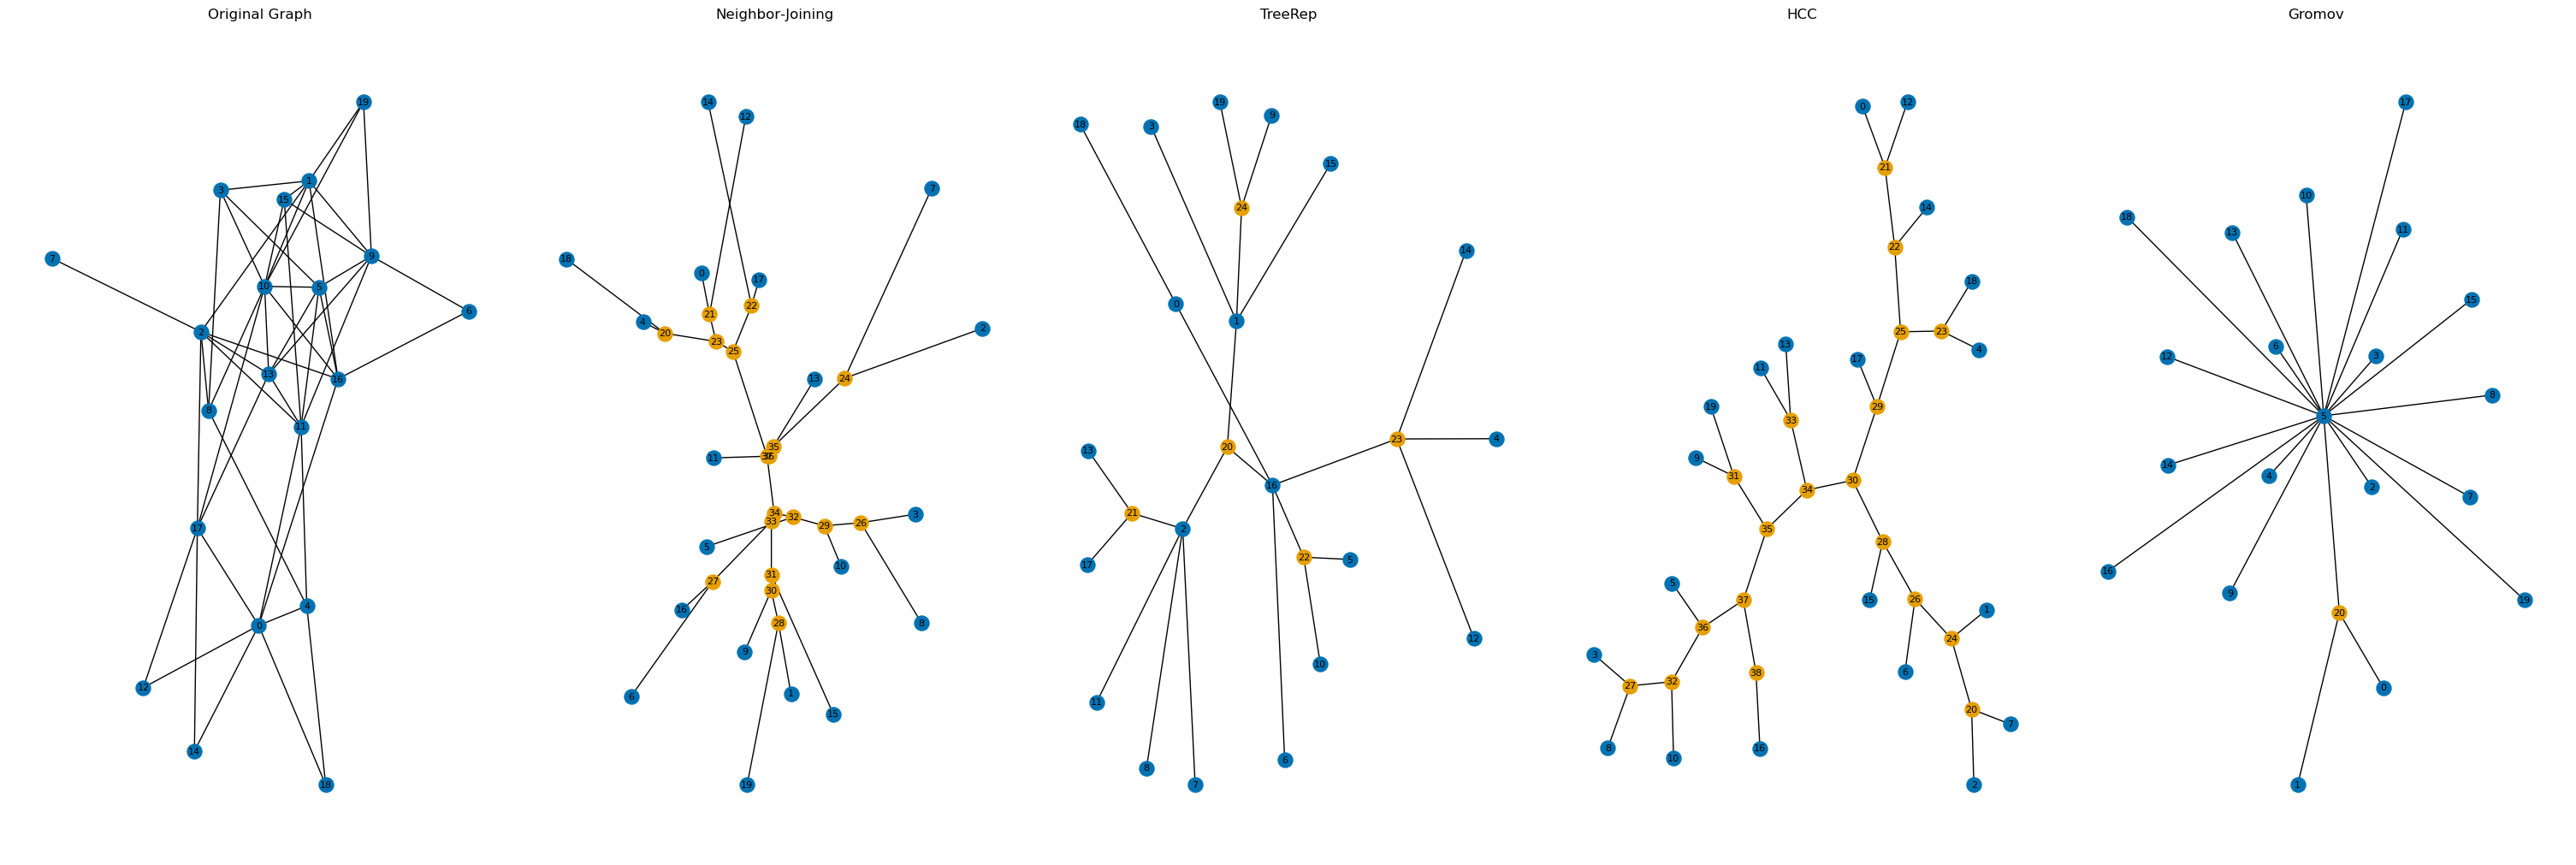

In [5]:
N = 20
random_graph = nx.gnp_random_graph(N, 0.3)
distances = nx.floyd_warshall_numpy(random_graph)

tree_nj = NJ(distances)
tree_nj_distances = nx.floyd_warshall_numpy(tree_nj)
for u, v, data in tree_nj.edges(data=True):
        data['len'] = tree_nj_distances[u, v]

tree_TR = TreeRep(distances)
tree_TR.learn_tree()
tree_TR_distances = nx.floyd_warshall_numpy(tree_TR.G)
for u, v, data in tree_TR.G.edges(data=True):
        data['len'] = tree_TR_distances[u, v]

tree_hcc = HccLinkage(distances)
tree_hcc.fit_tree(5)
tree_hcc_distance = nx.floyd_warshall_numpy(tree_hcc.G)
for u, v, data in tree_hcc.G.edges(data=True):
        data['len'] = tree_hcc_distance[u, v]

gromov_distance = gromov_tree(distances, 5)
tree_gromov = recover_tree_graph(gromov_distance, 5)
tree_gromov_full = enforce_gromov_closure(tree_gromov, gromov_distance, 5)
tree_gromov_full_distance = nx.floyd_warshall_numpy(tree_gromov_full)
for u, v, data in tree_gromov_full.edges(data=True):
        data['len'] = tree_gromov_full_distance[u, v]

fig, axes = plt.subplots(1, 5, figsize=(30, 10), constrained_layout=True)

# colorblind‑friendly
orig_color = '#0072B2'  # blue
int_color  = '#E69F00'  # orange

# 1) Original points with labels
ax = axes[0]
pos = nx.spring_layout(random_graph, seed=0)
nx.draw_networkx_edges(random_graph, pos, ax=ax)
nx.draw_networkx_nodes(random_graph, pos,
                        nodelist=[v for v in random_graph.nodes() if v < N],
                        node_color=orig_color, node_size=150, ax=ax)
nx.draw_networkx_labels(random_graph, pos,
                        labels={v: str(v) for v in random_graph.nodes()},
                        font_size=8, font_color='black', ax=ax)
ax.set_title('Original Graph', pad=10)
ax.axis('off')

# 2) Neighbor‑Joining
ax = axes[1]
pos_nj = graphviz_layout(tree_nj, prog='neato')
orig_nodes_nj = [v for v in tree_nj.nodes() if v < distances.shape[0]]
int_nodes_nj  = [v for v in tree_nj.nodes() if v >= distances.shape[0]]

nx.draw_networkx_edges(tree_nj, pos_nj, ax=ax)
nx.draw_networkx_nodes(tree_nj, pos_nj,
                       nodelist=orig_nodes_nj,
                       node_color=orig_color, node_size=150, ax=ax)
nx.draw_networkx_nodes(tree_nj, pos_nj,
                       nodelist=int_nodes_nj,
                       node_color=int_color,  node_size=150, ax=ax)
nx.draw_networkx_labels(tree_nj, pos_nj,
                        labels={v: str(v) for v in tree_nj.nodes()},
                        font_size=8, font_color='black', ax=ax)

ax.set_title('Neighbor‑Joining', pad=10)
ax.axis('off')

# 3) TreeRep
ax = axes[2]
pos_tr = graphviz_layout(tree_TR.G, prog='neato')
orig_nodes_tr = [v for v in tree_TR.G.nodes() if v < distances.shape[0]]
int_nodes_tr  = [v for v in tree_TR.G.nodes() if v >= distances.shape[0]]

nx.draw_networkx_edges(tree_TR.G, pos_tr, ax=ax)
nx.draw_networkx_nodes(tree_TR.G, pos_tr,
                       nodelist=orig_nodes_tr,
                       node_color=orig_color, node_size=150, ax=ax)
nx.draw_networkx_nodes(tree_TR.G, pos_tr,
                       nodelist=int_nodes_tr,
                       node_color=int_color,  node_size=150, ax=ax)
nx.draw_networkx_labels(tree_TR.G, pos_tr,
                        labels={v: str(v) for v in tree_TR.G.nodes()},
                        font_size=8, font_color='black', ax=ax)

ax.set_title('TreeRep', pad=10)
ax.axis('off')

# 3) HCC
ax = axes[3]
pos_tr = graphviz_layout(tree_hcc.G, prog='neato')
orig_nodes_tr = [v for v in tree_hcc.G.nodes() if v < distances.shape[0]]
int_nodes_tr  = [v for v in tree_hcc.G.nodes() if v >= distances.shape[0]]

nx.draw_networkx_edges(tree_hcc.G, pos_tr, ax=ax)
nx.draw_networkx_nodes(tree_hcc.G, pos_tr,
                       nodelist=orig_nodes_tr,
                       node_color=orig_color, node_size=150, ax=ax)
nx.draw_networkx_nodes(tree_hcc.G, pos_tr,
                       nodelist=int_nodes_tr,
                       node_color=int_color,  node_size=150, ax=ax)
nx.draw_networkx_labels(tree_hcc.G, pos_tr,
                        labels={v: str(v) for v in tree_hcc.G.nodes()},
                        font_size=8, font_color='black', ax=ax)
ax.set_title('HCC', pad=10)
ax.axis('off')

# 4) Gromov
ax = axes[4]
pos_tr = graphviz_layout(tree_gromov_full, prog='neato')
orig_nodes_tr = [v for v in tree_gromov_full.nodes() if v < distances.shape[0]]
int_nodes_tr  = [v for v in tree_gromov_full.nodes() if v >= distances.shape[0]]
nx.draw_networkx_edges(tree_gromov_full, pos_tr, ax=ax)
nx.draw_networkx_nodes(tree_gromov_full, pos_tr,
                       nodelist=orig_nodes_tr,
                       node_color=orig_color, node_size=150, ax=ax)
nx.draw_networkx_nodes(tree_gromov_full, pos_tr,
                       nodelist=int_nodes_tr,
                       node_color=int_color,  node_size=150, ax=ax)
nx.draw_networkx_labels(tree_gromov_full, pos_tr,
                        labels={v: str(v) for v in tree_gromov_full.nodes()},
                        font_size=8, font_color='black', ax=ax)

ax.set_title('Gromov', pad=10)
ax.axis('off')

plt.show()
